# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [10]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Lists to hold data frame variables
temp_max = []
humidity = []
clouds = []
latitude = []
longitude = []
wind_speed = []
city_name = []
country = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1550)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1550)
lat_lngs = zip(lats, lngs)
#print(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
# If the city is unique, then add it to our cities list   
    if city not in cities:
        cities.append(city)
    
        city = city.replace(' ','%20')
        query_url = "http://api.openweathermap.org/data/2.5/weather?q=" + city + "&appid=" + api_key + "&units=imperial"
        #print(query_url)
        
# Loop through the list of cities and perform a request for data on each
        response = requests.get(f'{query_url}').json()
        print(response)

# Skip Key errors so that program will run even if there is no city at location or some data is missing 
        try:
            wind_speed.append(response['wind']['speed'])
            wind_speed
        
            latitude.append(response['coord']['lat'])
            latitude

            longitude.append(response['coord']['lon'])
            longitude

            city_name.append(response['name'])
            city

            country.append(response['sys']['country'])
            country

            temp_max.append(response['main']['temp_max'])
            temp_max

            humidity.append(response['main']['humidity'])
            humidity

            clouds.append(response['clouds']['all'])
            clouds

            time.sleep(1.01)


        except KeyError:
            print("This location is not a city.")
               
# Print the city count to confirm sufficient count
len(cities)       


{'coord': {'lon': 168.86, 'lat': -46.19}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 42.01, 'pressure': 1006, 'humidity': 85, 'temp_min': 42.01, 'temp_max': 42.01}, 'wind': {'speed': 5.99, 'deg': 319, 'gust': 11.99}, 'clouds': {'all': 34}, 'dt': 1573495109, 'sys': {'type': 3, 'id': 2008959, 'country': 'NZ', 'sunrise': 1573491998, 'sunset': 1573545042}, 'timezone': 46800, 'id': 6201424, 'name': 'Mataura', 'cod': 200}
{'cod': '404', 'message': 'city not found'}
This location is not a city.
{'coord': {'lon': -134.42, 'lat': 58.3}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 34.36, 'pressure': 1017, 'humidity': 92, 'temp_min': 30.2, 'temp_max': 37.4}, 'visibility': 16093, 'wind': {'speed': 3.18, 'deg': 71}, 'clouds': {'all': 90}, 'dt': 1573495111, 'sys': {'type': 1, 'id': 7729, 'country': 'US', 'sunrise': 1573490187, '

{'coord': {'lon': 114.09, 'lat': 71.97}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'model', 'main': {'temp': -6.65, 'pressure': 1015, 'humidity': 96, 'temp_min': -6.65, 'temp_max': -6.65, 'sea_level': 1015, 'grnd_level': 1004}, 'wind': {'speed': 3.76, 'deg': 220}, 'clouds': {'all': 100}, 'dt': 1573495127, 'sys': {'country': 'RU', 'sunrise': 1573526169, 'sunset': 1573537163}, 'timezone': 32400, 'id': 2017155, 'name': 'Saskylakh', 'cod': 200}
{'coord': {'lon': 102.47, 'lat': 71.98}, 'weather': [{'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13n'}], 'base': 'model', 'main': {'temp': 2.23, 'pressure': 1019, 'humidity': 97, 'temp_min': 2.23, 'temp_max': 2.23, 'sea_level': 1019, 'grnd_level': 1015}, 'wind': {'speed': 4.83, 'deg': 322}, 'snow': {'3h': 0.56}, 'clouds': {'all': 100}, 'dt': 1573495129, 'sys': {'country': 'RU', 'sunrise': 1573528996, 'sunset': 1573539914}, 'timezone': 25200, 'id': 2022572, 'name': 'Khat

{'coord': {'lon': -67.52, 'lat': -46.43}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'model', 'main': {'temp': 63.09, 'pressure': 1014, 'humidity': 50, 'temp_min': 63.09, 'temp_max': 63.09, 'sea_level': 1014, 'grnd_level': 1004}, 'wind': {'speed': 11.39, 'deg': 34}, 'clouds': {'all': 0}, 'dt': 1573495133, 'sys': {'country': 'AR', 'sunrise': 1573462313, 'sunset': 1573515384}, 'timezone': -10800, 'id': 3863379, 'name': 'Mar del Plata', 'cod': 200}
{'cod': '404', 'message': 'city not found'}
This location is not a city.
{'coord': {'lon': -42.02, 'lat': -22.97}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}, {'id': 701, 'main': 'Mist', 'description': 'mist', 'icon': '50d'}], 'base': 'stations', 'main': {'temp': 72.61, 'pressure': 1014, 'humidity': 100, 'temp_min': 71.6, 'temp_max': 73.4}, 'visibility': 1500, 'wind': {'speed': 11.41, 'deg': 150}, 'clouds': {'all': 75}, 'dt': 1573495147, 'sys': {'type': 

{'coord': {'lon': -8.45, 'lat': 37.14}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 65.43, 'pressure': 1017, 'humidity': 77, 'temp_min': 64, 'temp_max': 66.2}, 'visibility': 10000, 'wind': {'speed': 17.22, 'deg': 280}, 'clouds': {'all': 20}, 'dt': 1573495164, 'sys': {'type': 1, 'id': 6892, 'country': 'PT', 'sunrise': 1573456086, 'sunset': 1573493256}, 'timezone': 0, 'id': 2267254, 'name': 'Lagoa', 'cod': 200}
{'coord': {'lon': 30.45, 'lat': -30.74}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'model', 'main': {'temp': 65.17, 'pressure': 1015, 'humidity': 97, 'temp_min': 65.17, 'temp_max': 65.17, 'sea_level': 1015, 'grnd_level': 992}, 'wind': {'speed': 9.22, 'deg': 58}, 'rain': {'3h': 2.63}, 'clouds': {'all': 100}, 'dt': 1573495165, 'sys': {'country': 'ZA', 'sunrise': 1573440922, 'sunset': 1573489746}, 'timezone': 7200, 'id': 964406, 'name': 'Port Shepstone'

{'cod': '404', 'message': 'city not found'}
This location is not a city.
{'coord': {'lon': -68.52, 'lat': 63.75}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 12.09, 'pressure': 997, 'humidity': 78, 'temp_min': 12, 'temp_max': 12.2}, 'visibility': 24140, 'wind': {'speed': 11.41, 'deg': 340}, 'clouds': {'all': 75}, 'dt': 1573495182, 'sys': {'type': 1, 'id': 797, 'country': 'CA', 'sunrise': 1573476351, 'sunset': 1573501826}, 'timezone': -18000, 'id': 5983720, 'name': 'Iqaluit', 'cod': 200}
{'coord': {'lon': 45.76, 'lat': 64.9}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'model', 'main': {'temp': 12.9, 'pressure': 1020, 'humidity': 94, 'temp_min': 12.9, 'temp_max': 12.9, 'sea_level': 1020, 'grnd_level': 1011}, 'wind': {'speed': 5.93, 'deg': 61}, 'clouds': {'all': 37}, 'dt': 1573495183, 'sys': {'country': 'RU', 'sunrise': 1573449418, 'sunset': 157347

{'coord': {'lon': 17.69, 'lat': -2.72}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'model', 'main': {'temp': 73.18, 'pressure': 1009, 'humidity': 97, 'temp_min': 73.18, 'temp_max': 73.18, 'sea_level': 1009, 'grnd_level': 973}, 'wind': {'speed': 2.37, 'deg': 263}, 'rain': {'3h': 1.06}, 'clouds': {'all': 100}, 'dt': 1573495201, 'sys': {'country': 'CD', 'sunrise': 1573446384, 'sunset': 1573490409}, 'timezone': 3600, 'id': 2311968, 'name': 'Nioki', 'cod': 200}
{'coord': {'lon': -97.86, 'lat': 55.74}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': -13.01, 'pressure': 1033, 'humidity': 75, 'temp_min': -13.01, 'temp_max': -13.01}, 'visibility': 24140, 'wind': {'speed': 2.24, 'deg': 220}, 'clouds': {'all': 20}, 'dt': 1573495203, 'sys': {'type': 1, 'id': 935, 'country': 'CA', 'sunrise': 1573480696, 'sunset': 1573511565}, 'timezone': -21600, 'id': 6165406, 'name': 'Tho

{'cod': '404', 'message': 'city not found'}
This location is not a city.
{'coord': {'lon': 38.73, 'lat': 8.96}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 62.6, 'pressure': 1022, 'humidity': 48, 'temp_min': 62.6, 'temp_max': 62.6}, 'visibility': 10000, 'wind': {'speed': 13.87, 'deg': 70}, 'clouds': {'all': 20}, 'dt': 1573495222, 'sys': {'type': 1, 'id': 2453, 'country': 'ET', 'sunrise': 1573442211, 'sunset': 1573484482}, 'timezone': 10800, 'id': 344979, 'name': 'Lebu', 'cod': 200}
{'coord': {'lon': -59.52, 'lat': 13.22}, 'weather': [{'id': 521, 'main': 'Rain', 'description': 'shower rain', 'icon': '09d'}], 'base': 'stations', 'main': {'temp': 84.2, 'pressure': 1011, 'humidity': 74, 'temp_min': 84.2, 'temp_max': 84.2}, 'visibility': 10000, 'wind': {'speed': 14.99, 'deg': 100}, 'clouds': {'all': 40}, 'dt': 1573495223, 'sys': {'type': 1, 'id': 8772, 'country': 'BB', 'sunrise': 1573466126, 'sunset': 157350773

{'coord': {'lon': 133.88, 'lat': -23.7}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 64.4, 'pressure': 1011, 'humidity': 10, 'temp_min': 64.4, 'temp_max': 64.4}, 'visibility': 10000, 'wind': {'speed': 5.82, 'deg': 70}, 'clouds': {'all': 0}, 'dt': 1573495240, 'sys': {'type': 1, 'id': 9483, 'country': 'AU', 'sunrise': 1573503175, 'sunset': 1573550657}, 'timezone': 34200, 'id': 2077895, 'name': 'Alice Springs', 'cod': 200}
{'coord': {'lon': 20.04, 'lat': -34.53}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 64.53, 'pressure': 1012, 'humidity': 88, 'temp_min': 62.6, 'temp_max': 66}, 'wind': {'speed': 16.11, 'deg': 170}, 'rain': {'3h': 0.5}, 'clouds': {'all': 89}, 'dt': 1573495241, 'sys': {'type': 1, 'id': 1966, 'country': 'ZA', 'sunrise': 1573442998, 'sunset': 1573492667}, 'timezone': 7200, 'id': 1015776, 'name': 'Bredasdorp', 'cod': 2

{'coord': {'lon': 34.53, 'lat': 10.07}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'model', 'main': {'temp': 67.53, 'pressure': 1007, 'humidity': 86, 'temp_min': 67.53, 'temp_max': 67.53, 'sea_level': 1007, 'grnd_level': 878}, 'wind': {'speed': 4.21, 'deg': 78}, 'rain': {'3h': 0.81}, 'clouds': {'all': 45}, 'dt': 1573495258, 'sys': {'country': 'ET', 'sunrise': 1573443304, 'sunset': 1573485405}, 'timezone': 10800, 'id': 343292, 'name': 'Asosa', 'cod': 200}
{'coord': {'lon': -47.36, 'lat': -0.61}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'model', 'main': {'temp': 81.59, 'pressure': 1006, 'humidity': 79, 'temp_min': 81.59, 'temp_max': 81.59, 'sea_level': 1006, 'grnd_level': 1007}, 'wind': {'speed': 18.97, 'deg': 71}, 'clouds': {'all': 25}, 'dt': 1573495259, 'sys': {'country': 'BR', 'sunrise': 1573462155, 'sunset': 1573505864}, 'timezone': -10800, 'id': 3389822, 'name': 'Salinopol

{'coord': {'lon': 140.77, 'lat': 51.48}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'model', 'main': {'temp': 35.06, 'pressure': 1000, 'humidity': 86, 'temp_min': 35.06, 'temp_max': 35.06, 'sea_level': 1000, 'grnd_level': 997}, 'wind': {'speed': 3.29, 'deg': 284}, 'rain': {'3h': 0.19}, 'clouds': {'all': 100}, 'dt': 1573495276, 'sys': {'country': 'RU', 'sunrise': 1573508902, 'sunset': 1573541623}, 'timezone': 36000, 'id': 2126018, 'name': 'De-Kastri', 'cod': 200}
{'cod': '404', 'message': 'city not found'}
This location is not a city.
{'coord': {'lon': 156.12, 'lat': 50.68}, 'weather': [{'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13n'}], 'base': 'model', 'main': {'temp': 29.28, 'pressure': 1014, 'humidity': 85, 'temp_min': 29.28, 'temp_max': 29.28, 'sea_level': 1014, 'grnd_level': 974}, 'wind': {'speed': 3.8, 'deg': 268}, 'snow': {'3h': 0.13}, 'clouds': {'all': 66}, 'dt': 1573495278, 'sys': {'country': 'RU', 'sunri

{'coord': {'lon': -51.29, 'lat': -0.12}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 95, 'pressure': 1008, 'humidity': 44, 'temp_min': 95, 'temp_max': 95}, 'visibility': 10000, 'wind': {'speed': 13.87, 'deg': 60}, 'clouds': {'all': 40}, 'dt': 1573495294, 'sys': {'type': 1, 'id': 8415, 'country': 'BR', 'sunrise': 1573463135, 'sunset': 1573506771}, 'timezone': -10800, 'id': 3395042, 'name': 'Mazagao', 'cod': 200}
{'coord': {'lon': -74.98, 'lat': 46.43}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'model', 'main': {'temp': 21.27, 'pressure': 1025, 'humidity': 37, 'temp_min': 21.27, 'temp_max': 21.27, 'sea_level': 1025, 'grnd_level': 982}, 'wind': {'speed': 2.77, 'deg': 1}, 'clouds': {'all': 95}, 'dt': 1573495295, 'sys': {'country': 'CA', 'sunrise': 1573473335, 'sunset': 1573507944}, 'timezone': -18000, 'id': 6050541, 'name': 'Laurentides', 'cod': 

{'coord': {'lon': 170.27, 'lat': 69.7}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'model', 'main': {'temp': 13.24, 'pressure': 1016, 'humidity': 83, 'temp_min': 13.24, 'temp_max': 13.24, 'sea_level': 1016, 'grnd_level': 1014}, 'wind': {'speed': 0.69, 'deg': 208}, 'clouds': {'all': 84}, 'dt': 1573495316, 'sys': {'country': 'RU', 'sunrise': 1573509512, 'sunset': 1573526851}, 'timezone': 43200, 'id': 2122090, 'name': 'Pevek', 'cod': 200}
{'coord': {'lon': -44.43, 'lat': -18.76}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'model', 'main': {'temp': 95.11, 'pressure': 1008, 'humidity': 22, 'temp_min': 95.11, 'temp_max': 95.11, 'sea_level': 1008, 'grnd_level': 924}, 'wind': {'speed': 4.41, 'deg': 272}, 'clouds': {'all': 14}, 'dt': 1573495219, 'sys': {'country': 'BR', 'sunrise': 1573460021, 'sunset': 1573506593}, 'timezone': -10800, 'id': 3464891, 'name': 'Curvelo', 'cod': 200}
{'coord

{'coord': {'lon': -131.65, 'lat': 55.34}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 44.6, 'pressure': 1014, 'humidity': 81, 'temp_min': 44.6, 'temp_max': 44.6}, 'visibility': 16093, 'wind': {'speed': 10.29, 'deg': 110, 'gust': 24.16}, 'rain': {'1h': 1.65}, 'clouds': {'all': 90}, 'dt': 1573495335, 'sys': {'type': 1, 'id': 7754, 'country': 'US', 'sunrise': 1573488718, 'sunset': 1573519765}, 'timezone': -32400, 'id': 5554428, 'name': 'Ketchikan', 'cod': 200}
{'coord': {'lon': 16.94, 'lat': -12.38}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'model', 'main': {'temp': 62.94, 'pressure': 1012, 'humidity': 91, 'temp_min': 62.94, 'temp_max': 62.94, 'sea_level': 1012, 'grnd_level': 834}, 'wind': {'speed': 5.08, 'deg': 345}, 'rain': {'3h': 2.56}, 'clouds': {'all': 99}, 'dt': 1573495336, 'sys': {'country': 'AO', 'sunrise': 1573445820, 'sunset': 1573491333}, 'timez

{'coord': {'lon': 141.86, 'lat': 39.28}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'model', 'main': {'temp': 50.43, 'pressure': 1001, 'humidity': 84, 'temp_min': 50.43, 'temp_max': 50.43, 'sea_level': 1001, 'grnd_level': 987}, 'wind': {'speed': 5.75, 'deg': 258}, 'clouds': {'all': 77}, 'dt': 1573495354, 'sys': {'country': 'JP', 'sunrise': 1573506710, 'sunset': 1573543291}, 'timezone': 32400, 'id': 2112444, 'name': 'Kamaishi', 'cod': 200}
{'coord': {'lon': -94.42, 'lat': 30.04}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 73.22, 'pressure': 1016, 'humidity': 69, 'temp_min': 68, 'temp_max': 78.8}, 'visibility': 16093, 'wind': {'speed': 8.05, 'deg': 80}, 'clouds': {'all': 40}, 'dt': 1573495355, 'sys': {'type': 1, 'id': 3495, 'country': 'US', 'sunrise': 1573475968, 'sunset': 1573514643}, 'timezone': -21600, 'id': 4732862, 'name': 'Nome', 'cod': 200

{'coord': {'lon': 32.53, 'lat': 34.92}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 67.33, 'pressure': 1015, 'humidity': 40, 'temp_min': 62.01, 'temp_max': 71.6}, 'visibility': 10000, 'wind': {'speed': 5.82, 'deg': 10}, 'clouds': {'all': 0}, 'dt': 1573495373, 'sys': {'type': 1, 'id': 6374, 'country': 'CY', 'sunrise': 1573445991, 'sunset': 1573483678}, 'timezone': 7200, 'id': 146639, 'name': 'Lasa', 'cod': 200}
{'coord': {'lon': 147.99, 'lat': -37.88}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 74.79, 'pressure': 995, 'humidity': 20, 'temp_min': 72, 'temp_max': 78.01}, 'wind': {'speed': 4, 'deg': 28, 'gust': 15.01}, 'clouds': {'all': 99}, 'dt': 1573495374, 'sys': {'type': 3, 'id': 2011895, 'country': 'AU', 'sunrise': 1573498248, 'sunset': 1573548811}, 'timezone': 39600, 'id': 2160735, 'name': 'Lakes Entrance', 'cod': 200}
{

{'coord': {'lon': 92.75, 'lat': 11.67}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'model', 'main': {'temp': 81.84, 'pressure': 1010, 'humidity': 72, 'temp_min': 81.84, 'temp_max': 81.84, 'sea_level': 1010, 'grnd_level': 1010}, 'wind': {'speed': 6.73, 'deg': 72}, 'clouds': {'all': 62}, 'dt': 1573495392, 'sys': {'country': 'IN', 'sunrise': 1573429451, 'sunset': 1573471311}, 'timezone': 19800, 'id': 1259385, 'name': 'Port Blair', 'cod': 200}
{'coord': {'lon': -115.79, 'lat': 60.82}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 5, 'pressure': 1013, 'humidity': 71, 'temp_min': 5, 'temp_max': 5}, 'visibility': 24140, 'wind': {'speed': 5.82, 'deg': 220}, 'clouds': {'all': 20}, 'dt': 1573495393, 'sys': {'type': 1, 'id': 819, 'country': 'CA', 'sunrise': 1573486532, 'sunset': 1573514337}, 'timezone': -25200, 'id': 5972762, 'name': 'Hay River', 'cod': 200}
{'coo

{'coord': {'lon': 16.43, 'lat': -28.55}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'model', 'main': {'temp': 62.51, 'pressure': 1012, 'humidity': 82, 'temp_min': 62.51, 'temp_max': 62.51, 'sea_level': 1012, 'grnd_level': 997}, 'wind': {'speed': 9.37, 'deg': 275}, 'clouds': {'all': 0}, 'dt': 1573495411, 'sys': {'country': 'ZA', 'sunrise': 1573444512, 'sunset': 1573492886}, 'timezone': 7200, 'id': 3354071, 'name': 'Oranjemund', 'cod': 200}
{'coord': {'lon': 146.19, 'lat': 68.54}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'model', 'main': {'temp': -1.92, 'pressure': 1016, 'humidity': 94, 'temp_min': -1.92, 'temp_max': -1.92, 'sea_level': 1016, 'grnd_level': 1009}, 'wind': {'speed': 1.25, 'deg': 360}, 'clouds': {'all': 96}, 'dt': 1573495412, 'sys': {'country': 'RU', 'sunrise': 1573514247, 'sunset': 1573533676}, 'timezone': 39600, 'id': 2126785, 'name': 'Belaya Gora', 'cod': 200}
{

{'coord': {'lon': -121.92, 'lat': 36.62}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 61.81, 'pressure': 1018, 'humidity': 55, 'temp_min': 55.4, 'temp_max': 70}, 'visibility': 16093, 'wind': {'speed': 3.36, 'deg': 330}, 'clouds': {'all': 1}, 'dt': 1573495429, 'sys': {'type': 1, 'id': 4980, 'country': 'US', 'sunrise': 1573483278, 'sunset': 1573520534}, 'timezone': -28800, 'id': 5380437, 'name': 'Pacific Grove', 'cod': 200}
{'coord': {'lon': -48.88, 'lat': -18.87}, 'weather': [{'id': 200, 'main': 'Thunderstorm', 'description': 'thunderstorm with light rain', 'icon': '11d'}], 'base': 'stations', 'main': {'temp': 78.8, 'pressure': 1015, 'humidity': 54, 'temp_min': 78.8, 'temp_max': 78.8}, 'visibility': 10000, 'wind': {'speed': 5.82, 'deg': 130}, 'clouds': {'all': 75}, 'dt': 1573495430, 'sys': {'type': 1, 'id': 8471, 'country': 'BR', 'sunrise': 1573461079, 'sunset': 1573507670}, 'timezone': -10800, 'id': 3456880,

{'coord': {'lon': -16.54, 'lat': 14.69}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 86, 'pressure': 1007, 'humidity': 37, 'temp_min': 86, 'temp_max': 86}, 'visibility': 10000, 'wind': {'speed': 14.99, 'deg': 350}, 'clouds': {'all': 59}, 'dt': 1573495448, 'sys': {'type': 1, 'id': 2410, 'country': 'SN', 'sunrise': 1573455924, 'sunset': 1573497301}, 'timezone': 0, 'id': 2249901, 'name': 'Gat', 'cod': 200}
{'coord': {'lon': 35.15, 'lat': 42.03}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'model', 'main': {'temp': 62.65, 'pressure': 1020, 'humidity': 56, 'temp_min': 62.65, 'temp_max': 62.65, 'sea_level': 1020, 'grnd_level': 1014}, 'wind': {'speed': 4.32, 'deg': 138}, 'clouds': {'all': 14}, 'dt': 1573495449, 'sys': {'country': 'TR', 'sunrise': 1573446230, 'sunset': 1573482182}, 'timezone': 10800, 'id': 739600, 'name': 'Sinop', 'cod': 200}
{'coord': {'lon':

{'coord': {'lon': 13.15, 'lat': 11.84}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'model', 'main': {'temp': 88.27, 'pressure': 1005, 'humidity': 20, 'temp_min': 88.27, 'temp_max': 88.27, 'sea_level': 1005, 'grnd_level': 968}, 'wind': {'speed': 3.6, 'deg': 56}, 'clouds': {'all': 92}, 'dt': 1573495466, 'sys': {'country': 'NG', 'sunrise': 1573448573, 'sunset': 1573490400}, 'timezone': 3600, 'id': 2331447, 'name': 'Maiduguri', 'cod': 200}
{'coord': {'lon': 100.22, 'lat': 64.27}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'model', 'main': {'temp': -19.02, 'pressure': 1026, 'humidity': 93, 'temp_min': -19.02, 'temp_max': -19.02, 'sea_level': 1026, 'grnd_level': 972}, 'wind': {'speed': 3.89, 'deg': 237}, 'clouds': {'all': 99}, 'dt': 1573495467, 'sys': {'country': 'RU', 'sunrise': 1573522604, 'sunset': 1573547386}, 'timezone': 25200, 'id': 2014833, 'name': 'Tura', 'cod': 200}
{'

{'coord': {'lon': 41.86, 'lat': 3.94}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 82, 'pressure': 1006, 'humidity': 24, 'temp_min': 82, 'temp_max': 82}, 'wind': {'speed': 11.12, 'deg': 83}, 'clouds': {'all': 62}, 'dt': 1573495208, 'sys': {'type': 3, 'id': 2013573, 'country': 'ET', 'sunrise': 1573441081, 'sunset': 1573484109}, 'timezone': 10800, 'id': 187896, 'name': 'Mandera', 'cod': 200}
{'coord': {'lon': -149.33, 'lat': -17.53}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 80.28, 'pressure': 1013, 'humidity': 69, 'temp_min': 80.01, 'temp_max': 80.6}, 'visibility': 10000, 'wind': {'speed': 8.05, 'deg': 230}, 'clouds': {'all': 20}, 'dt': 1573495486, 'sys': {'type': 1, 'id': 7318, 'country': 'PF', 'sunrise': 1573485297, 'sunset': 1573531673}, 'timezone': -36000, 'id': 4033356, 'name': 'Tiarei', 'cod': 200}
{'coord': {'lon': 

{'coord': {'lon': 105.78, 'lat': 15.12}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'model', 'main': {'temp': 68.16, 'pressure': 1009, 'humidity': 96, 'temp_min': 68.16, 'temp_max': 68.16, 'sea_level': 1009, 'grnd_level': 976}, 'wind': {'speed': 2.35, 'deg': 152}, 'clouds': {'all': 69}, 'dt': 1573495504, 'sys': {'country': 'LA', 'sunrise': 1573513019, 'sunset': 1573554302}, 'timezone': 25200, 'id': 1654379, 'name': 'Pakxe', 'cod': 200}
{'coord': {'lon': -63.06, 'lat': 18.22}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 84.81, 'pressure': 1014, 'humidity': 62, 'temp_min': 84, 'temp_max': 86}, 'visibility': 10000, 'wind': {'speed': 14.99, 'deg': 110}, 'clouds': {'all': 40}, 'dt': 1573495505, 'sys': {'type': 1, 'id': 8788, 'country': 'AI', 'sunrise': 1573467377, 'sunset': 1573508179}, 'timezone': -14400, 'id': 3573374, 'name': 'The Valley', 'cod': 

{'cod': '404', 'message': 'city not found'}
This location is not a city.
{'coord': {'lon': -35.46, 'lat': -5.2}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 87.8, 'pressure': 1009, 'humidity': 52, 'temp_min': 87.8, 'temp_max': 87.8}, 'visibility': 10000, 'wind': {'speed': 17.22, 'deg': 160}, 'clouds': {'all': 40}, 'dt': 1573495523, 'sys': {'type': 1, 'id': 8452, 'country': 'BR', 'sunrise': 1573458952, 'sunset': 1573503355}, 'timezone': -10800, 'id': 3386213, 'name': 'Touros', 'cod': 200}
{'coord': {'lon': 27.46, 'lat': -17.26}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'model', 'main': {'temp': 79.9, 'pressure': 1008, 'humidity': 69, 'temp_min': 79.9, 'temp_max': 79.9, 'sea_level': 1008, 'grnd_level': 947}, 'wind': {'speed': 10.65, 'deg': 131}, 'rain': {'3h': 0.81}, 'clouds': {'all': 99}, 'dt': 1573495524, 'sys': {'country': 'ZM', 'sunrise': 1573442

{'coord': {'lon': 6.65, 'lat': 44.9}, 'weather': [{'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13n'}], 'base': 'stations', 'main': {'temp': 38.34, 'pressure': 1006, 'humidity': 91, 'temp_min': 30, 'temp_max': 44.01}, 'wind': {'speed': 2.46, 'deg': 312}, 'snow': {'3h': 0.25}, 'clouds': {'all': 100}, 'dt': 1573495541, 'sys': {'type': 3, 'id': 2001739, 'country': 'FR', 'sunrise': 1573453486, 'sunset': 1573488606}, 'timezone': 3600, 'id': 3030142, 'name': 'Briancon', 'cod': 200}
{'coord': {'lon': -16.33, 'lat': 33.08}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 69.03, 'pressure': 1026, 'humidity': 68, 'temp_min': 68, 'temp_max': 69.8}, 'visibility': 10000, 'wind': {'speed': 16.11, 'deg': 20}, 'clouds': {'all': 40}, 'dt': 1573495291, 'sys': {'type': 1, 'id': 6902, 'country': 'PT', 'sunrise': 1573457526, 'sunset': 1573495598}, 'timezone': 0, 'id': 2270385, 'name': 'Camacha', 'cod': 20

{'cod': '404', 'message': 'city not found'}
This location is not a city.
{'coord': {'lon': 13.84, 'lat': -18.06}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'model', 'main': {'temp': 75, 'pressure': 1008, 'humidity': 54, 'temp_min': 75, 'temp_max': 75, 'sea_level': 1008, 'grnd_level': 870}, 'wind': {'speed': 15.41, 'deg': 136}, 'rain': {'3h': 0.56}, 'clouds': {'all': 56}, 'dt': 1573495559, 'sys': {'country': 'NA', 'sunrise': 1573446098, 'sunset': 1573492543}, 'timezone': 7200, 'id': 3354077, 'name': 'Opuwo', 'cod': 200}
{'coord': {'lon': 125.66, 'lat': 39.62}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'model', 'main': {'temp': 41.43, 'pressure': 1020, 'humidity': 64, 'temp_min': 41.43, 'temp_max': 41.43, 'sea_level': 1020, 'grnd_level': 1016}, 'wind': {'speed': 4.79, 'deg': 25}, 'clouds': {'all': 0}, 'dt': 1573495560, 'sys': {'country': 'KP', 'sunrise': 1573510644, 'sunset': 157354713

{'coord': {'lon': 108.12, 'lat': 57.78}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'model', 'main': {'temp': -2.44, 'pressure': 1030, 'humidity': 87, 'temp_min': -2.44, 'temp_max': -2.44, 'sea_level': 1030, 'grnd_level': 974}, 'wind': {'speed': 6.6, 'deg': 253}, 'clouds': {'all': 100}, 'dt': 1573495577, 'sys': {'country': 'RU', 'sunrise': 1573518270, 'sunset': 1573547928}, 'timezone': 28800, 'id': 2022083, 'name': 'Kirensk', 'cod': 200}
{'coord': {'lon': 179.32, 'lat': 63.05}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'model', 'main': {'temp': 34.12, 'pressure': 999, 'humidity': 97, 'temp_min': 34.12, 'temp_max': 34.12, 'sea_level': 999, 'grnd_level': 998}, 'wind': {'speed': 22.39, 'deg': 53}, 'rain': {'3h': 0.75}, 'clouds': {'all': 100}, 'dt': 1573495578, 'sys': {'country': 'RU', 'sunrise': 1573503015, 'sunset': 1573529004}, 'timezone': 43200, 'id': 2126710, 'name': 'Beringov

{'coord': {'lon': 143.24, 'lat': 59.36}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'model', 'main': {'temp': 4.37, 'pressure': 1009, 'humidity': 75, 'temp_min': 4.37, 'temp_max': 4.37, 'sea_level': 1009, 'grnd_level': 1003}, 'wind': {'speed': 10.16, 'deg': 343}, 'clouds': {'all': 0}, 'dt': 1573495597, 'sys': {'country': 'RU', 'sunrise': 1573510311, 'sunset': 1573539028}, 'timezone': 36000, 'id': 2122605, 'name': 'Okhotsk', 'cod': 200}
{'coord': {'lon': 30.81, 'lat': -14.56}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'model', 'main': {'temp': 77.47, 'pressure': 1006, 'humidity': 58, 'temp_min': 77.47, 'temp_max': 77.47, 'sea_level': 1006, 'grnd_level': 910}, 'wind': {'speed': 8.55, 'deg': 120}, 'rain': {'3h': 1.25}, 'clouds': {'all': 79}, 'dt': 1573495598, 'sys': {'country': 'ZM', 'sunrise': 1573442316, 'sunset': 1573488179}, 'timezone': 7200, 'id': 900056, 'name': 'Nyimba', 'cod': 20

{'coord': {'lon': -110.76, 'lat': 43.48}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 33.98, 'pressure': 1031, 'humidity': 37, 'temp_min': 28.99, 'temp_max': 37}, 'visibility': 16093, 'wind': {'speed': 1.41, 'deg': 157}, 'clouds': {'all': 1}, 'dt': 1573495508, 'sys': {'type': 1, 'id': 3814, 'country': 'US', 'sunrise': 1573481482, 'sunset': 1573516972}, 'timezone': -25200, 'id': 5828648, 'name': 'Jackson', 'cod': 200}
{'coord': {'lon': 1.01, 'lat': 20.2}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'model', 'main': {'temp': 71.38, 'pressure': 1010, 'humidity': 7, 'temp_min': 71.38, 'temp_max': 71.38, 'sea_level': 1010, 'grnd_level': 955}, 'wind': {'speed': 10.27, 'deg': 14}, 'clouds': {'all': 0}, 'dt': 1573495617, 'sys': {'country': 'ML', 'sunrise': 1573452159, 'sunset': 1573492641}, 'timezone': 0, 'id': 2449893, 'name': 'Tessalit', 'cod': 200}
{'coord': {'lon

{'cod': '404', 'message': 'city not found'}
This location is not a city.
{'coord': {'lon': -105.99, 'lat': 49.63}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'model', 'main': {'temp': 9.72, 'pressure': 1041, 'humidity': 71, 'temp_min': 9.72, 'temp_max': 9.72, 'sea_level': 1041, 'grnd_level': 941}, 'wind': {'speed': 8.84, 'deg': 222}, 'clouds': {'all': 0}, 'dt': 1573495635, 'sys': {'country': 'CA', 'sunrise': 1573481335, 'sunset': 1573514830}, 'timezone': -21600, 'id': 5887798, 'name': 'Assiniboia', 'cod': 200}
{'coord': {'lon': 25.21, 'lat': 0.52}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10n'}], 'base': 'model', 'main': {'temp': 72.63, 'pressure': 1006, 'humidity': 97, 'temp_min': 72.63, 'temp_max': 72.63, 'sea_level': 1006, 'grnd_level': 956}, 'wind': {'speed': 4.21, 'deg': 256}, 'rain': {'3h': 3.25}, 'clouds': {'all': 100}, 'dt': 1573495636, 'sys': {'country': 'CD', 'sunrise': 1573444822, 'sun

{'coord': {'lon': 9.75, 'lat': 10.31}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'model', 'main': {'temp': 83.08, 'pressure': 1006, 'humidity': 33, 'temp_min': 83.08, 'temp_max': 83.08, 'sea_level': 1006, 'grnd_level': 944}, 'wind': {'speed': 3.62, 'deg': 77}, 'clouds': {'all': 94}, 'dt': 1573495654, 'sys': {'country': 'NG', 'sunrise': 1573449271, 'sunset': 1573491334}, 'timezone': 3600, 'id': 2347470, 'name': 'Miri', 'cod': 200}
{'coord': {'lon': 72.36, 'lat': 34.78}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'model', 'main': {'temp': 45.14, 'pressure': 1023, 'humidity': 24, 'temp_min': 45.14, 'temp_max': 45.14, 'sea_level': 1023, 'grnd_level': 821}, 'wind': {'speed': 10.8, 'deg': 22}, 'clouds': {'all': 100}, 'dt': 1573495655, 'sys': {'country': 'PK', 'sunrise': 1573436410, 'sunset': 1573474139}, 'timezone': 18000, 'id': 1170395, 'name': 'Mingaora', 'cod': 200}
{'coord

{'coord': {'lon': 131.25, 'lat': -0.86}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'model', 'main': {'temp': 71.91, 'pressure': 1009, 'humidity': 98, 'temp_min': 71.91, 'temp_max': 71.91, 'sea_level': 1009, 'grnd_level': 998}, 'wind': {'speed': 1.52, 'deg': 117}, 'clouds': {'all': 92}, 'dt': 1573495406, 'sys': {'country': 'ID', 'sunrise': 1573505673, 'sunset': 1573549421}, 'timezone': 32400, 'id': 1626542, 'name': 'Sorong', 'cod': 200}
{'coord': {'lon': 18.26, 'lat': 0.05}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'model', 'main': {'temp': 72.36, 'pressure': 1009, 'humidity': 98, 'temp_min': 72.36, 'temp_max': 72.36, 'sea_level': 1009, 'grnd_level': 972}, 'wind': {'speed': 4.68, 'deg': 194}, 'rain': {'3h': 2.75}, 'clouds': {'all': 100}, 'dt': 1573495674, 'sys': {'country': 'CD', 'sunrise': 1573446455, 'sunset': 1573490065}, 'timezone': 3600, 'id': 2312895, 'name': 'Mbandaka',

{'cod': '404', 'message': 'city not found'}
This location is not a city.
{'coord': {'lon': 10.65, 'lat': -3.44}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'model', 'main': {'temp': 80.04, 'pressure': 1008, 'humidity': 79, 'temp_min': 80.04, 'temp_max': 80.04, 'sea_level': 1008, 'grnd_level': 1008}, 'wind': {'speed': 6.08, 'deg': 219}, 'clouds': {'all': 100}, 'dt': 1573495692, 'sys': {'country': 'GA', 'sunrise': 1573448019, 'sunset': 1573492153}, 'timezone': 3600, 'id': 2399001, 'name': 'Mayumba', 'cod': 200}
{'coord': {'lon': 15.03, 'lat': 4.15}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'model', 'main': {'temp': 73.69, 'pressure': 1007, 'humidity': 79, 'temp_min': 73.69, 'temp_max': 73.69, 'sea_level': 1007, 'grnd_level': 937}, 'wind': {'speed': 3.89, 'deg': 185}, 'clouds': {'all': 100}, 'dt': 1573495694, 'sys': {'country': 'CF', 'sunrise': 1573447537, 'sunset': 157349

{'coord': {'lon': 79.81, 'lat': 28.63}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'model', 'main': {'temp': 63.88, 'pressure': 1013, 'humidity': 49, 'temp_min': 63.88, 'temp_max': 63.88, 'sea_level': 1013, 'grnd_level': 991}, 'wind': {'speed': 5.77, 'deg': 312}, 'clouds': {'all': 0}, 'dt': 1573495711, 'sys': {'country': 'IN', 'sunrise': 1573433992, 'sunset': 1573472981}, 'timezone': 19800, 'id': 1259686, 'name': 'Pilibhit', 'cod': 200}
{'coord': {'lon': 9.72, 'lat': 51.2}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 37.56, 'pressure': 1004, 'humidity': 78, 'temp_min': 36, 'temp_max': 39}, 'visibility': 10000, 'wind': {'speed': 10.29, 'deg': 140}, 'clouds': {'all': 75}, 'dt': 1573495713, 'sys': {'type': 1, 'id': 1319, 'country': 'DE', 'sunrise': 1573453831, 'sunset': 1573486788}, 'timezone': 3600, 'id': 2905293, 'name': 'Hessisch Lichtenau', 'cod': 200}

{'coord': {'lon': -22.43, 'lat': 63.84}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 38.12, 'pressure': 997, 'humidity': 86, 'temp_min': 37.4, 'temp_max': 39.2}, 'visibility': 10000, 'wind': {'speed': 10.29, 'deg': 100}, 'clouds': {'all': 75}, 'dt': 1573495730, 'sys': {'type': 1, 'id': 90, 'country': 'IS', 'sunrise': 1573465307, 'sunset': 1573490746}, 'timezone': 0, 'id': 3416888, 'name': 'Grindavik', 'cod': 200}
{'coord': {'lon': 116.55, 'lat': 33.44}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'model', 'main': {'temp': 58.71, 'pressure': 1016, 'humidity': 28, 'temp_min': 58.71, 'temp_max': 58.71, 'sea_level': 1016, 'grnd_level': 1013}, 'wind': {'speed': 6.15, 'deg': 125}, 'clouds': {'all': 86}, 'dt': 1573495731, 'sys': {'country': 'CN', 'sunrise': 1573512109, 'sunset': 1573550042}, 'timezone': 28800, 'id': 1800764, 'name': 'Tancheng', 'cod': 20

613

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [11]:
### Convert Raw Data to DataFrame
weather_data = {'Max Temperature': temp_max, 'Humidity': humidity, 'Cloudiness': clouds, 'Wind Speed': wind_speed, 'City Name': city_name, 'Country': country, 'Latitude': latitude, 'Longitude': longitude}
weather_data_df = pd.DataFrame(weather_data)

# Export the city data into a .csv.
#weather_data_df = pd.read_csv(weather_data, encoding="ISO-8859-1")
#weather_data_df.to_csv("Output/.weather_df.csv", index=False, header=True)
weather_data_df.to_csv("weather_df.csv")

#Display the DataFrame
weather_data_df.tail()

,Max Temperature,Humidity,Cloudiness,Wind Speed,City Name,Country,Latitude,Longitude
547,77.04,79,55,3.44,Nacala,MZ,-14.56,40.69
548,78.15,57,15,6.42,Limbe,MW,-15.81,35.05
549,25.63,94,100,4.65,Tilichiki,RU,60.47,166.10
550,81.32,74,100,16.91,Gigmoto,PH,13.78,124.39
551,-4.15,84,0,5.70,Yerofey Pavlovich,RU,53.97,121.97


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

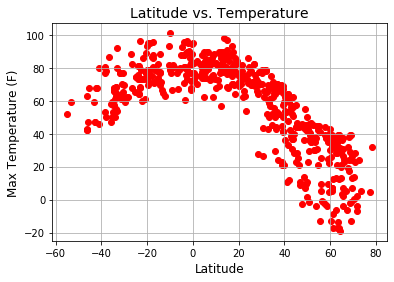

In [12]:
# Scatterplot 1
plt.scatter(weather_data_df["Latitude"], weather_data_df["Max Temperature"], color = "r", marker="o")

plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Max Temperature (F)", fontsize=12)
plt.title("Latitude vs. Temperature", fontsize=14)
plt.grid(True)

#save figure to .png
plt.savefig("Latitude_vs_Temperature.png")

#Show result
plt.show()


#### Latitude vs. Humidity Plot

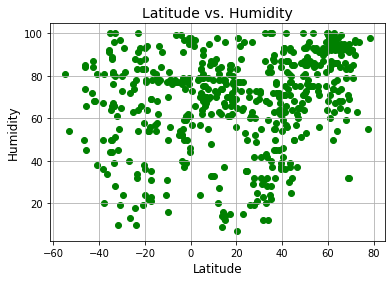

In [13]:
plt.scatter(weather_data_df["Latitude"], weather_data_df["Humidity"], color = "g", marker="o")

plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Humidity", fontsize=12)
plt.title("Latitude vs. Humidity", fontsize=14)
plt.grid(True)
plt.savefig("lat_vs_hum.png")
plt.show()


#### Latitude vs. Cloudiness Plot

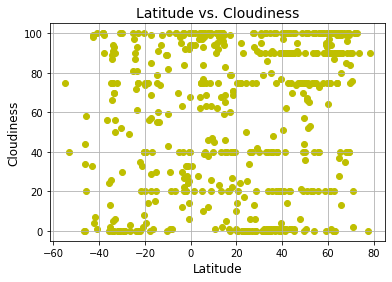

In [14]:
plt.scatter(weather_data_df["Latitude"], weather_data_df["Cloudiness"], color = "y", marker="o")

plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Cloudiness", fontsize=12)
plt.title("Latitude vs. Cloudiness", fontsize=14)
plt.grid(True)
plt.savefig("lat_vs_cloud.png")
plt.show()


#### Latitude vs. Wind Speed Plot

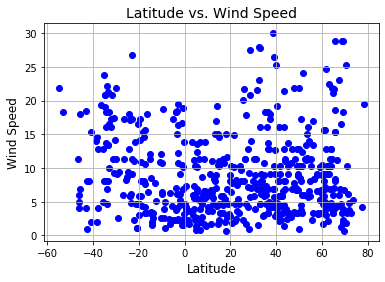

In [15]:
plt.scatter(weather_data_df["Latitude"], weather_data_df["Wind Speed"], color = "b", marker="o")

plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Wind Speed", fontsize=12)
plt.title("Latitude vs. Wind Speed", fontsize=14)
plt.grid(True)
plt.savefig("lat_vs_wind.png")
plt.show()
